# Udacity Data Wrangling Project

In [914]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline
import tweepy
import requests
import json
from timeit import default_timer as timer

# GATHER DATA 

### Reading Twitter Archived File

In [915]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', sep=',')


### Gathering and ReadingTweet Image Prediction data

In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open (url.split('/')[-1],mode='wb') as file:
    file.write(response.content)


In [919]:
df_image_predictions=pd.read_table('image-predictions.tsv')

### Gathering Twitter Retweet/Favourite count data

In [ ]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

### Reading tweet-json data into data frame

In [917]:

list_tweets=[]

with open('tweet-json.txt') as json_file:
    
    for line in json_file:
        try:
            tweet_data = json.loads(line)
            list_tweets.append(tweet_data)
        except:
            continue

df_tweets = pd.DataFrame()
df_tweets['tweet_id'] = list(map(lambda tweet_data: tweet_data['id'], list_tweets))
df_tweets['retweet_count'] = list(map(lambda tweet_data: tweet_data['retweet_count'], list_tweets))
df_tweets['favorite_count'] = list(map(lambda tweet_data: tweet_data['favorite_count'], list_tweets))

In [918]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assessing Data  for

    *df_twitter_archive
    *df_image_predictions
    *df_tweets

In [920]:
df_twitter_archive.shape

(2356, 17)

In [922]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [923]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [924]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [925]:
df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1064,740995100998766593,NaN,NaN,2016-06-09 19:52:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a vape god. Blows o's for da...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740995100...,10,10,Leo,None,None,None,None
2170,669351434509529089,NaN,NaN,2015-11-25 03:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sully. He's a Leviticus Galapagos. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669351434...,10,10,Sully,None,None,None,None
490,813812741911748608,NaN,NaN,2016-12-27 18:24:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Gary, Carrie Fisher's dog. Idk what I can...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/813812741...,14,10,Gary,None,None,None,None
220,850019790995546112,NaN,NaN,2017-04-06 16:18:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Boomer. He's a sandy pupper. Havi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850019790...,12,10,Boomer,None,None,pupper,None
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,None,None
957,751538714308972544,NaN,NaN,2016-07-08 22:09:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Max. She has one ear that's always sli...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751538714...,10,10,Max,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233...,12,10,None,None,None,None,None
1609,685547936038666240,NaN,NaN,2016-01-08 19:45:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody needs to read this. Jack is our firs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685547936...,14,10,None,None,None,pupper,None
1788,677557565589463040,NaN,NaN,2015-12-17 18:34:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Reckless pupper here. Not even looking at road...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677557565...,10,10,None,None,None,pupper,None
1225,714141408463036416,NaN,NaN,2016-03-27 17:25:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know we only rate dogs, but since it's Easte...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/714141408...,10,10,None,None,None,None,None


In [926]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [927]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [928]:
df_twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [929]:
df_twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [930]:
df_twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [931]:
df_twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [932]:
df_twitter_archive['retweeted_status_id'].count()

181

In [933]:
df_twitter_archive['in_reply_to_status_id'].count()

78

In [934]:
df_twitter_archive['in_reply_to_user_id'].count()

78

In [935]:
(df_twitter_archive['name']=='None').sum()

745

In [936]:
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Assesing Image Predictions data

In [937]:
df_image_predictions.shape

(2075, 12)

In [938]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [939]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [940]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [941]:
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1602,800018252395122689,https://pbs.twimg.com/ext_tw_video_thumb/80001...,1,vacuum,0.289485,False,punching_bag,0.243297,False,barbell,0.143630,False
1653,809920764300447744,https://pbs.twimg.com/media/Cz1qo05XUAQ4qXp.jpg,1,Norwich_terrier,0.397163,True,toy_poodle,0.274540,True,miniature_poodle,0.134667,True
380,673295268553605120,https://pbs.twimg.com/media/CVgGc9hWIAIe1bn.jpg,1,golden_retriever,0.889241,True,Labrador_retriever,0.064683,True,Great_Pyrenees,0.012613,True
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
292,671186162933985280,https://pbs.twimg.com/media/CVCIQX7UkAEzqh_.jpg,1,Chihuahua,0.319106,True,whippet,0.169134,True,toy_terrier,0.125815,True
1388,766313316352462849,https://pbs.twimg.com/media/CqJ95SRWgAATPK_.jpg,1,toy_poodle,0.966896,True,miniature_poodle,0.016424,True,cocker_spaniel,0.010227,True
334,672169685991993344,https://pbs.twimg.com/media/CVQGv-vUwAEUjCj.jpg,1,cocker_spaniel,0.991011,True,Sussex_spaniel,0.004032,True,miniature_poodle,0.001276,True
158,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,1,teddy,0.413379,False,pillow,0.325623,False,miniature_schnauzer,0.035537,True
742,687460506001633280,https://pbs.twimg.com/media/CYpZrtDWwAE8Kpw.jpg,1,Boston_bull,0.223366,True,boxer,0.183596,True,French_bulldog,0.176916,True
689,684188786104872960,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,1,kelpie,0.537782,True,American_Staffordshire_terrier,0.082953,True,Staffordshire_bullterrier,0.069760,True


In [942]:
df_image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [943]:
df_image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

### Assesing Retweet and Favourite count data

In [944]:
df_tweets.shape

(2354, 3)

In [945]:
df_tweets

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [946]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [947]:
df_tweets.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [948]:
df_tweets.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [949]:
df_tweets.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues
    
#### Twitter Archive Data
    
        1) 745 entries have dog name as none. We will rename these enteries as dog_1,dog_2....... so that when analyzing 
        we can depict findings based on dog name. 
        2) Missing values in expanded urls
        3) Incorrect data types (tweet_id,timestamp)
        4) There are multiple entries where denominator rating value in not equal to 10, these entries voilate the genral 
        rating rule of we rate the dogs so these will be removed. 
        5) Source column has unnecessary html a tags also 
        6)Renaming columns name to dog_name,timestamp to tweet_time so that they are more descriptive.

#### Image Prediction Data
        
        1)Incorrect data types in tweet_id
        2) Will remove columns p2,p2_conf,p2_dog,p3,p3_conf,p3_dog as we will only consider the prediction p1 for our 
        analysis.
        3) Column names p1,p1_conf,p1_dog not descriptive and clear
        
       
#### Retweets and Favourite Count Data

        1) Incorrect data types in tweet_id
        


### Tidiness  issues

        1) Three different tables for the data should be one table

### Twitter Archive data
    
        1)Entries belonging to replies causing duplicacy 
        2)Entries belonging to retweets causing duplicacy 
        3)Columns belonging to retweets and replies are of no use for our analysis          
        4) Different columns for dog stage

## Cleaning

### Quality Issues

In [950]:
# creating copy of dataframes for cleaning 

df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweets_clean = df_tweets.copy()

In [951]:
df_twitter_archive_clean.shape

(2356, 17)

In [952]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [953]:
#Define : Renaming name column enteries having None as name

#Code
dog_name_count=0
for i in range(2356):
    if(df_twitter_archive_clean['name'][i]=='None'):
        dog_name_count=dog_name_count+1
        df_twitter_archive_clean['name'][i]='Dog_'+str(dog_name_count)
        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [954]:
#Test 
(df_twitter_archive_clean['name']=='None').sum()

0

In [955]:
#Define: Missing values in expanded urls dropping this column as this is not required in our analysis
#Code
df_twitter_archive_clean.drop(['expanded_urls'], axis = 1,inplace=True) 

In [956]:
#Test
list(df_twitter_archive_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [957]:
#Define : Correcting the datatypes of tweet_id and timestamp column to string and date time respectively
#Code
df_twitter_archive_clean.tweet_id = df_twitter_archive_clean.tweet_id.astype(str)
df_twitter_archive_clean.timestamp = pd.to_datetime(df_twitter_archive_clean.timestamp)

In [958]:
#test
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(9)
memory usage: 2

In [959]:
#Define : Removing entries with rating_denominator not equal to 10
#Code
df_twitter_archive_clean.drop(df_twitter_archive_clean[df_twitter_archive_clean.rating_denominator != 10].index, inplace=True)

In [960]:
# Test
df_twitter_archive_clean.rating_denominator.value_counts()


10    2333
Name: rating_denominator, dtype: int64

In [961]:
#Define : Removing HTML <a> tags from source 
#code
df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')
df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].astype('category')

In [962]:
#test
df_twitter_archive_clean.source.value_counts()

Twitter for iPhone     2198
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [963]:
#Define : Renaming columns name to dog_name,timestamp to tweet_time 
#Code
df_twitter_archive_clean.rename(columns={'name': 'dog_name', 'timestamp': 'tweet_time'}, inplace=True)

In [964]:
#Test 
list(df_twitter_archive_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_time',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [965]:
#Define : Correcting the datatypes of tweet_id to string
#Code
df_image_predictions_clean.tweet_id = df_image_predictions_clean.tweet_id.astype(str)

In [966]:
#Test
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [967]:
#Define: Removing columns p2,p2_conf,p2_dog,p3,p3_conf,p3_dog 
#Code 
df_image_predictions_clean.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis = 1,inplace=True) 
    

In [968]:
#test
list(df_image_predictions_clean.columns)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog']

In [969]:
#Define: Renaming columns p1,p1_conf,p1_dog
#code
df_image_predictions_clean.rename(columns={'p1': 'predicted', 'p1_conf': 'predicted_conf','p1_dog':'predicted_dog'}, inplace=True)

In [970]:
list(df_image_predictions_clean.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'predicted',
 'predicted_conf',
 'predicted_dog']

In [971]:
#Define : Correcting the datatypes of tweet_id and timestamp column to string and date time respectively
#Code
df_tweets_clean.tweet_id = df_tweets_clean.tweet_id.astype(str)


In [972]:
#test
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Tidiness Issues

In [973]:
#Define : Removing entries belonging to replies
#code
df_twitter_archive_clean.drop(df_twitter_archive_clean[df_twitter_archive_clean.in_reply_to_user_id.notnull()].index, inplace = True)

In [974]:
#Test
df_twitter_archive_clean.in_reply_to_user_id.notnull().sum()

0

In [975]:
#Define : Removing entries belonging to retweets
#code
df_twitter_archive_clean.drop(df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_id.notnull()].index, inplace = True)

In [976]:
#Test
df_twitter_archive_clean.retweeted_status_id.notnull().sum()

0

In [977]:
#Define : removing columns belonging to retweets and replies as they are not needed
#code
df_twitter_archive_clean.drop(['retweeted_status_timestamp','retweeted_status_id','retweeted_status_user_id','in_reply_to_status_id','in_reply_to_user_id'], axis = 1,inplace=True) 

In [978]:
#Test 
list(df_twitter_archive_clean.columns)

['tweet_id',
 'tweet_time',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [979]:
# Define : Creating one column for for dog stage instead of seprate columns doggo,floofer,pupper,puppo
#Code:
df_twitter_archive_clean['dog_stage'] = df_twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)
df_twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1,inplace=True)


In [980]:
df_image_predictions_clean.tweet_id = df_image_predictions_clean.tweet_id.astype('category')

In [981]:
#Test
df_twitter_archive_clean.dog_stage.value_counts()

pupper     235
doggo       79
puppo       29
floofer      4
Name: dog_stage, dtype: int64

In [982]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2080 non-null object
tweet_time            2080 non-null datetime64[ns]
source                2080 non-null category
text                  2080 non-null object
rating_numerator      2080 non-null int64
rating_denominator    2080 non-null int64
dog_name              2080 non-null object
dog_stage             347 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 132.2+ KB


### Merging all the Tables in one table 

In [983]:
df_twitter_master = pd.merge(left=df_twitter_archive_clean, right=df_image_predictions_clean,
                            on=['tweet_id'], how='inner')

In [984]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 13 columns):
tweet_id              1954 non-null object
tweet_time            1954 non-null datetime64[ns]
source                1954 non-null category
text                  1954 non-null object
rating_numerator      1954 non-null int64
rating_denominator    1954 non-null int64
dog_name              1954 non-null object
dog_stage             316 non-null object
jpg_url               1954 non-null object
img_num               1954 non-null int64
predicted             1954 non-null object
predicted_conf        1954 non-null float64
predicted_dog         1954 non-null bool
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 187.2+ KB


In [985]:

df_twitter_master = pd.merge(left=df_twitter_master, right=df_tweets_clean,
                            on=['tweet_id'], how='inner')

In [986]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 15 columns):
tweet_id              1954 non-null object
tweet_time            1954 non-null datetime64[ns]
source                1954 non-null category
text                  1954 non-null object
rating_numerator      1954 non-null int64
rating_denominator    1954 non-null int64
dog_name              1954 non-null object
dog_stage             316 non-null object
jpg_url               1954 non-null object
img_num               1954 non-null int64
predicted             1954 non-null object
predicted_conf        1954 non-null float64
predicted_dog         1954 non-null bool
retweet_count         1954 non-null int64
favorite_count        1954 non-null int64
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 217.7+ KB


In [987]:
# creating csv file with df_twitter_master
df_twitter_master.to_csv('twitter_master.csv',index=False)

## Analyze

In [988]:
df_twitter_master.head()

,tweet_id,tweet_time,source,text,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,img_num,predicted,predicted_conf,predicted_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,9774,41048


### The most common tweet source

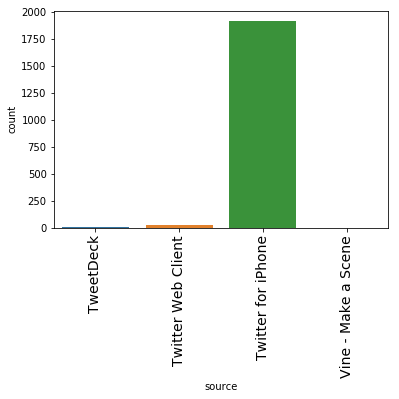

In [989]:
sns.countplot(data = df_twitter_master, x = 'source')
plt.xticks(fontsize=14, rotation=90);

### Most common Dog stages

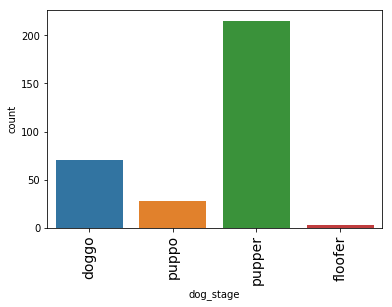

In [990]:
sns.countplot(data = df_twitter_master, x = 'dog_stage')
plt.xticks(fontsize=14, rotation=90);

### Top 10 retweet counts

In [991]:
# sorting values on retweet_count
df_twitter_master=df_twitter_master.sort_values(by=['retweet_count'],ascending=False)

df_twitter_master.retweet_count.head(10)


766     79515
395     56625
800     52360
306     48265
58      45849
329     42228
397     37911
631     33421
108     32883
1452    31989
Name: retweet_count, dtype: int64

#### The highest number of retweets on any tweet is 79515.

### Top 10 favorite_count

In [992]:
# sorting values on favorite_count
df_twitter_master=df_twitter_master.sort_values(by=['favorite_count'],ascending=False)

df_twitter_master.retweet_count.head(10)


306    48265
766    79515
58     45849
395    56625
108    32883
329    42228
93     27680
397    37911
134    25661
800    52360
Name: retweet_count, dtype: int64

#### The highest number of likes on any tweet is 48265.

### Mean numerator rating 

In [993]:
df_twitter_master.rating_numerator.describe()

count    1954.000000
mean       11.700614
std        41.079593
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

### Most Common Dog Name 

In [994]:
df_twitter_master.dog_name.value_counts()

a             54
Charlie       11
Oliver        10
Lucy          10
Cooper        10
Tucker         9
Penny          9
Sadie          8
Winston        8
the            7
Lola           7
Daisy          7
Toby           7
Bella          6
Bo             6
Koda           6
Jax            6
Stanley        6
Scout          5
Chester        5
Oscar          5
Milo           5
Bailey         5
Rusty          5
an             5
Buddy          5
Dave           5
Louis          5
Leo            5
Duke           4
              ..
Lilly          1
Mya            1
Dog_695        1
Bobby          1
Laela          1
Karl           1
Fynn           1
Dog_744        1
Dog_299        1
such           1
Dog_416        1
Bronte         1
Dog_137        1
Lipton         1
Snickers       1
Dog_678        1
incredibly     1
Sierra         1
Vinnie         1
Pepper         1
Dog_631        1
Arnie          1
Dog_613        1
Kendall        1
Dog_40         1
Dog_241        1
Dog_243        1
Kallie        

## Insights

* Most common tweet source is IPHONE
* Most common dog stage is pupper
* Maximum retweets a tweet has got is 79515
* Maximum likes a tweet has got is 48265
* Mean dog rating is 11.7
* Most common dog name is Charlie (ignoring 'a' as dog_name)


## Sources Reffered


https://stackoverflow.com/
https://www.udacity.com/
https://stackabuse.com/
